In [ ]:
import numpy as np
import urllib.request
#for ccg coordinates https://openprescribing.net/api/1.0/org_location/?q=05Q&format=json
#for getting info on all ccg counties 'https://openprescribing.net/api/1.0/org_location/?org_type=ccg&format=json'
#for getting info an all spending https://openprescribing.net/api/1.0/spending_by_ccg/?code=03&format=json
import json
import matplotlib.dates
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib
from tqdm import tqdm
import pickle
from google.colab import files

In [ ]:
url = 'https://openprescribing.net/api/1.0/spending_by_ccg/?code=0301011R0&format=json'
fileobj = urllib.request.urlopen(url)
all_data = json.loads(fileobj.read().decode('utf-8'))

In [ ]:
area_ids = list(set([x['row_id'] for x in all_data])) 

In [ ]:
all_dates = list(set([x['date'] for x in all_data])) 

In [ ]:
master_dict = dict()
for id in area_ids:
  listo = [x for x in all_data if x['row_id'] == id]
  master_dict[id] = listo

In [ ]:
co_ordiate_dict = dict()
for id in tqdm(area_ids):
    url = 'https://openprescribing.net/api/1.0/org_location/?q={}'.format(id)
    miniobj = urllib.request.urlopen(url)
    packet = json.loads(miniobj.read().decode('utf-8'))
    co_ordinates = [x['geometry']['coordinates'] for x in packet['features'] if x['geometry'] != None]
    means = np.array(co_ordinates).mean(axis=0).tolist()
    co_ordiate_dict[id] = means

100%|██████████| 138/138 [01:11<00:00,  1.93it/s]


In [ ]:
def timify(y):
  return datetime.datetime.strptime(y, '%Y-%m-%d')

In [ ]:
time_cost_tuples = dict()
for id in area_ids:
  esssentials = [(timify(x['date']), x['actual_cost']) for x in master_dict[id]]
  time_cost_tuples[id] = esssentials

In [ ]:
date_dictionary = dict()
for date in all_dates:
  listo = [x for x in all_data if x['date'] == date]
  date_dictionary[date] = listo


master_date_dictionary = dict()
for date in all_dates:
  costs_array = [x['actual_cost'] for x in date_dictionary[date]]
  items_array = [x['items'] for x in date_dictionary[date]]
  co_ordinates_array = [co_ordiate_dict[x['row_id']] for x in date_dictionary[date]]
  master_date_dictionary[timify(date)] = (np.array(co_ordinates_array), np.array(costs_array), np.array(items_array))



total_items_array = [master_date_dictionary[timify(date)][2].sum() for date in all_dates]
total_costs_array = [master_date_dictionary[timify(date)][1].sum() for date in all_dates]
dates_array = [timify(date) for date in all_dates]

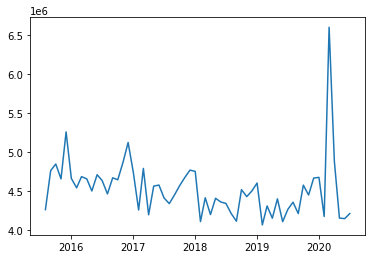

In [ ]:
dictionary = dict(zip(dates_array , total_costs_array))
lists = sorted(dictionary.items())
x, y = zip(*lists)

matplotlib.pyplot.plot(x, y)

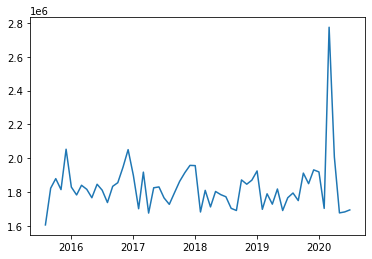

In [ ]:
dictionary = dict(zip(dates_array , total_items_array))
lists = sorted(dictionary.items())
x, y = zip(*lists)

matplotlib.pyplot.plot(x, y)

In [ ]:
# filename = 'outfile.pkl'
# outfile = open(filename,'wb')
# pickle.dump(dictionary,outfile)
# outfile.close()
# files.download('outfile.pkl')

In [ ]:
uploaded = files.upload()

Saving test.pickle to test.pickle


In [ ]:
filename = 'test.pickle'
outfile = open(filename,'rb')
b = pickle.load(outfile)
outfile.close()

In [ ]:
lists = sorted(b.items())
x_aero, y_aero = zip(*lists)

In [ ]:
lists = sorted(dictionary.items())
x, y = zip(*lists)

In [ ]:
corr_dict={}
for key in dictionary.keys():
  if key in b.keys():
    corr_dict[dictionary[key]]=b[key]

In [ ]:
lists = sorted(corr_dict.items())
x_1, y_1 = zip(*lists)

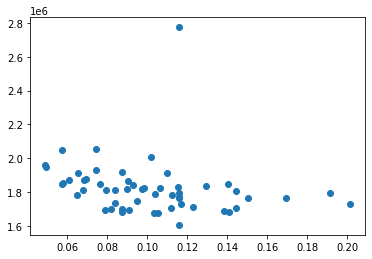

In [ ]:
matplotlib.pyplot.scatter(y_1, x_1)

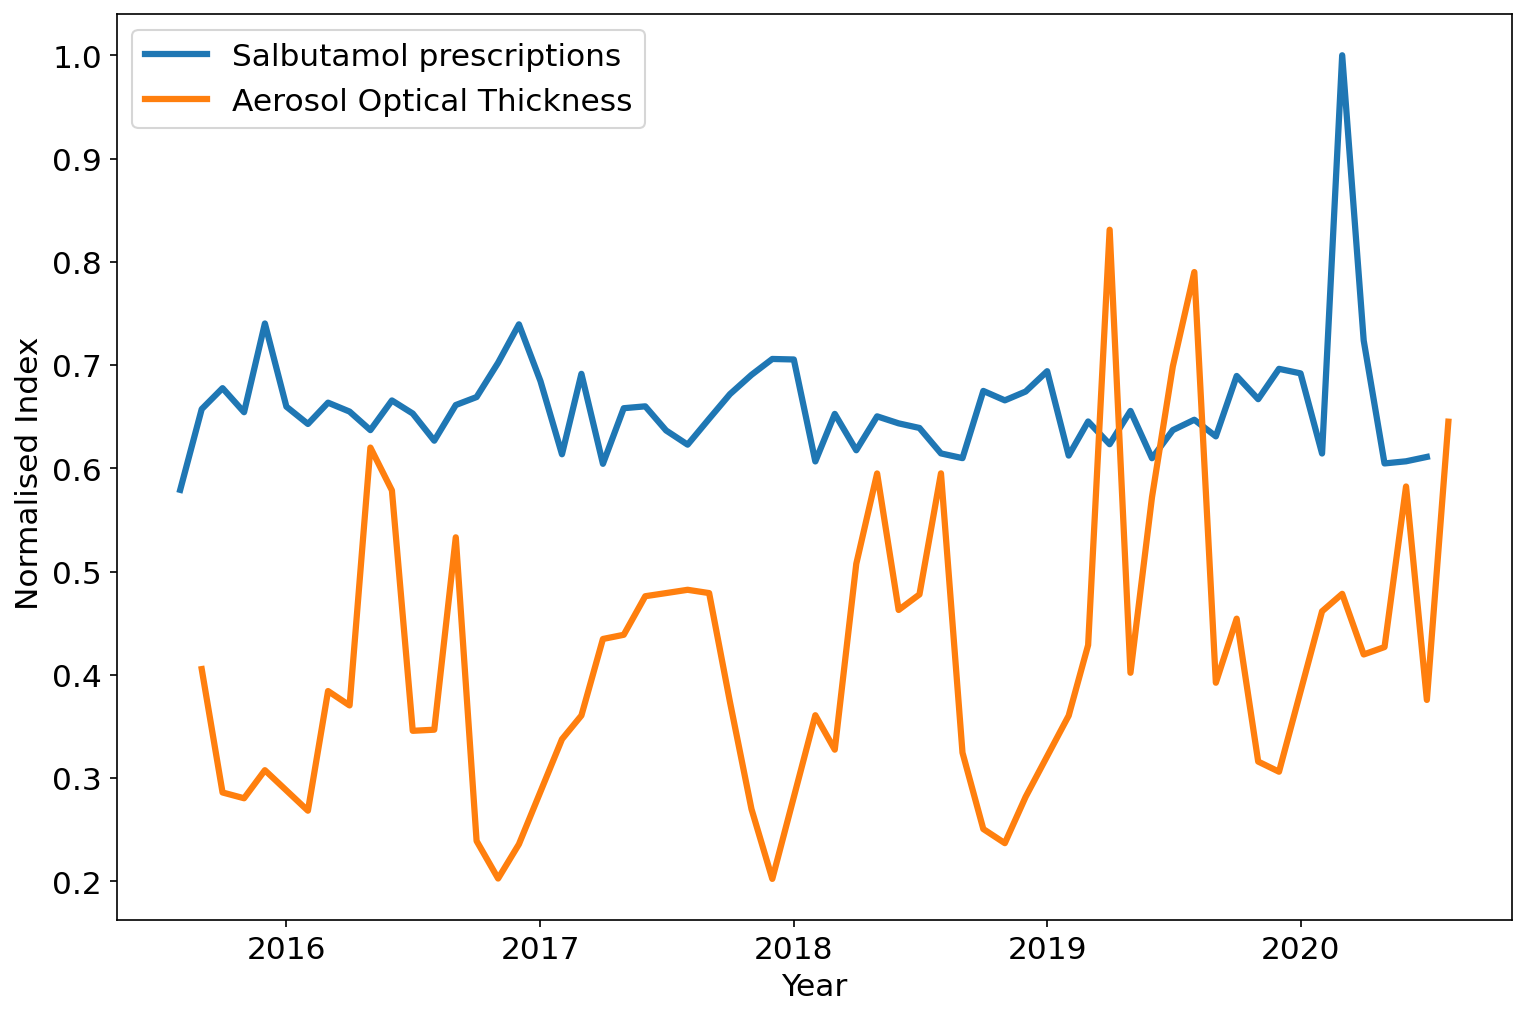

In [ ]:
plt.figure(figsize=(12, 8), dpi=150)


matplotlib.pyplot.plot(x,y/max(y), label = 'Salbutamol prescriptions ', linewidth = 3)
matplotlib.pyplot.plot(x_aero[150:],y_aero[150:]/max(y_aero), label='Aerosol Optical Thickness', linewidth=3)
# matplotlib.pyplot.xlim(2016, 2020)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Normalised Index ', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize  =15)





In [ ]:
matplotlib.pyplot.plot((x_1/max(x_1) - (y_1/max(y_1))))

In [ ]:
ratios = []
for value in range(len(x_1)):
  ratios.append(x_1[value]/y_1[value])



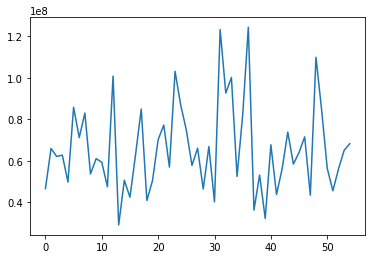

In [ ]:
matplotlib.pyplot.plot(ratios)

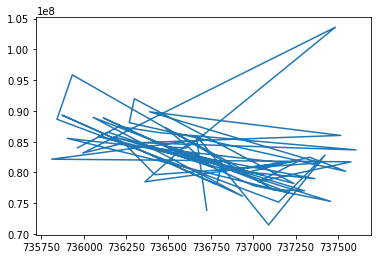

In [ ]:
dates = matplotlib.dates.date2num(dates_array)
matplotlib.pyplot.plot(dates, total_costs_array)